In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [2]:
import tensorflow as tf
!pip install -U tensorboard_plugin_profile


Requirement already up-to-date: tensorboard_plugin_profile in c:\users\madhu\anaconda3\lib\site-packages (2.4.0)


In [3]:
data=pd.read_csv("Gesture_features_all.csv")

In [4]:
data

,A,B,C,D,angle,area,perimeter,defects,label
0,842.997058,326.882323,211.795104,1053.005954,195.899881,574.5,104.526911,3,B
1,861.791556,344.992657,210.533231,905.594706,186.268223,586.0,108.769552,3,B
2,856.088014,339.842473,210.393284,780.835613,201.034972,597.5,108.183766,3,B
3,850.380188,325.709511,211.140567,1182.685834,194.280566,598.0,106.769552,3,B
4,869.685125,351.019250,212.503909,753.007098,193.275381,576.5,105.355339,3,B
...,...,...,...,...,...,...,...,...,...
19995,458.781749,130.558815,269.121055,1333.367972,109.809426,13377.5,935.570629,3,9
19996,460.400941,170.968994,271.428967,1200.640826,111.408774,13348.5,932.256920,3,9
19997,456.462338,157.800451,262.991263,1508.333209,108.332264,13445.0,921.813269,3,9
19998,460.160168,156.072432,270.124509,1103.297592,112.840986,13344.5,935.712764,3,9


In [5]:
#data= data.drop(['Unnamed: 0'],axis=1)

In [6]:
data

,A,B,C,D,angle,area,perimeter,defects,label
0,842.997058,326.882323,211.795104,1053.005954,195.899881,574.5,104.526911,3,B
1,861.791556,344.992657,210.533231,905.594706,186.268223,586.0,108.769552,3,B
2,856.088014,339.842473,210.393284,780.835613,201.034972,597.5,108.183766,3,B
3,850.380188,325.709511,211.140567,1182.685834,194.280566,598.0,106.769552,3,B
4,869.685125,351.019250,212.503909,753.007098,193.275381,576.5,105.355339,3,B
...,...,...,...,...,...,...,...,...,...
19995,458.781749,130.558815,269.121055,1333.367972,109.809426,13377.5,935.570629,3,9
19996,460.400941,170.968994,271.428967,1200.640826,111.408774,13348.5,932.256920,3,9
19997,456.462338,157.800451,262.991263,1508.333209,108.332264,13445.0,921.813269,3,9
19998,460.160168,156.072432,270.124509,1103.297592,112.840986,13344.5,935.712764,3,9


In [7]:
X=data.iloc[:,0:8].values
print("Shape of X",X.shape)
print("Examples of X\n",X[0])
y=data.iloc[:,8].values
print("Shape of y",y.shape)
print("Examples of y\n",y[:10])

Shape of X (20000, 8)
Examples of X
 [ 842.9970577  326.8823229  211.7951041 1053.005954   195.8998811
  574.5        104.5269114    3.       ]
Shape of y (20000,)
Examples of y
 ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']


In [8]:
print(data["label"].unique())

['B' 'C' 'L' 'P' 'R' 'T' 'W' 'Doctor' 'This' 'Your' 'Mine' '1' '2' '3' '4'
 '5' '6' '7' '8' '9']


In [9]:
data.loc[data["label"]=="B","label"]=0
data.loc[data["label"]=="C","label"]=1
data.loc[data["label"]=="L","label"]=2
data.loc[data["label"]=="P","label"]=3
data.loc[data["label"]=="R","label"]=4
data.loc[data["label"]=="W","label"]=5
data.loc[data["label"]=="T","label"]=6
data.loc[data["label"]=="Doctor","label"]=7
data.loc[data["label"]=="This","label"]=8
data.loc[data["label"]=="Your","label"]=9
data.loc[data["label"]=="Mine","label"]=10
data.loc[data["label"]=="1","label"]=11
data.loc[data["label"]=="2","label"]=12
data.loc[data["label"]=="3","label"]=13
data.loc[data["label"]=="4","label"]=14
data.loc[data["label"]=="5","label"]=15
data.loc[data["label"]=="6","label"]=16
data.loc[data["label"]=="7","label"]=17
data.loc[data["label"]=="8","label"]=18
data.loc[data["label"]=="9","label"]=19

print(data.head())

            A           B           C            D       angle   area  \
0  842.997058  326.882323  211.795104  1053.005954  195.899881  574.5   
1  861.791556  344.992657  210.533231   905.594706  186.268223  586.0   
2  856.088014  339.842473  210.393284   780.835613  201.034972  597.5   
3  850.380188  325.709511  211.140567  1182.685834  194.280566  598.0   
4  869.685125  351.019250  212.503909   753.007098  193.275381  576.5   

    perimeter  defects label  
0  104.526911        3     0  
1  108.769552        3     0  
2  108.183766        3     0  
3  106.769552        3     0  
4  105.355339        3     0  


In [10]:
data.loc[[19999],:]

,A,B,C,D,angle,area,perimeter,defects,label
19999,456.741057,154.880944,273.443933,1057.274109,111.036724,13503.0,941.126977,3,19


In [11]:
data1 = data.loc[0:999]
data2 = data.loc[1000:1999]
data3 = data.loc[2000:2999]
data4 = data.loc[3000:3999]
data5 = data.loc[4000:4999]
data6 = data.loc[5000:5999]
data7 = data.loc[6000:6999]
data8 = data.loc[7000:7999]
data9 = data.loc[8000:8999]
data10 = data.loc[9000:9999]
data11 = data.loc[10000:10999]
data12 = data.loc[11000:11999]
data13 = data.loc[12000:12999]
data14 = data.loc[13000:13999]
data15 = data.loc[14000:14999]
data16 = data.loc[15000:15999]
data17 = data.loc[16000:16999]
data18 = data.loc[17000:17999]
data19 = data.loc[18000:18999]
data20 = data.loc[19000:19999]



In [12]:
data1=data1.iloc[np.random.permutation(len(data1))]
data2=data2.iloc[np.random.permutation(len(data2))]
data3=data3.iloc[np.random.permutation(len(data3))]
data4=data4.iloc[np.random.permutation(len(data4))]
data5=data5.iloc[np.random.permutation(len(data5))]
data6=data6.iloc[np.random.permutation(len(data6))]
data7=data7.iloc[np.random.permutation(len(data7))]
data8=data8.iloc[np.random.permutation(len(data8))]
data9=data9.iloc[np.random.permutation(len(data9))]
data10=data10.iloc[np.random.permutation(len(data10))]
data11=data11.iloc[np.random.permutation(len(data11))]
data12=data12.iloc[np.random.permutation(len(data12))]
data13=data13.iloc[np.random.permutation(len(data13))]
data14=data14.iloc[np.random.permutation(len(data14))]
data15=data15.iloc[np.random.permutation(len(data15))]
data16=data16.iloc[np.random.permutation(len(data16))]
data17=data17.iloc[np.random.permutation(len(data17))]
data18=data18.iloc[np.random.permutation(len(data18))]
data19=data19.iloc[np.random.permutation(len(data19))]
data20=data20.iloc[np.random.permutation(len(data20))]

In [13]:
data7

,A,B,C,D,angle,area,perimeter,defects,label
6717,825.542851,441.367730,0.000000,449.177519,0.000000,21911.0,1078.798111,0,5
6427,754.214994,382.837447,81.301577,272.833511,151.072118,19150.0,1008.288445,2,5
6170,739.022879,390.233807,84.398549,513.859417,152.636586,19381.5,996.933107,2,5
6069,748.857764,392.640085,93.329813,637.879139,147.551319,22214.5,1008.104680,2,5
6123,720.853401,374.890682,91.135408,510.369235,160.000778,19670.5,988.246818,2,5
...,...,...,...,...,...,...,...,...,...
6237,735.671574,351.330163,133.628673,494.376623,155.843908,19689.0,990.749341,2,5
6684,814.568989,452.563031,0.000000,326.130601,0.000000,21269.0,1076.312830,0,5
6834,745.725353,437.736746,0.000000,456.110627,0.000000,19272.0,1004.430581,0,5
6777,724.896493,329.917554,46.141088,281.251996,89.565182,17569.5,997.418388,1,5


In [14]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20], axis=0)

In [15]:
data

,A,B,C,D,angle,area,perimeter,defects,label
415,845.569508,336.959909,252.531590,892.299584,178.724699,453.0,94.284271,3,0
396,823.103821,329.033525,263.984702,1027.119418,169.637884,628.5,110.183766,3,0
966,871.952838,338.176359,260.757606,1220.428186,158.177709,646.0,110.426406,3,0
331,947.646526,395.650720,259.575065,1226.579651,246.940171,358.5,84.041630,4,0
343,902.016862,347.213287,219.883588,1228.142634,270.907123,400.0,87.455844,4,0
...,...,...,...,...,...,...,...,...,...
19655,411.782942,160.724494,222.641624,985.700566,93.902073,11722.5,819.546243,3,19
19659,389.345770,129.251029,223.201060,723.392723,96.713768,11854.5,826.031525,3,19
19719,430.525766,153.886453,209.095075,713.376463,113.575534,11414.5,806.516806,3,19
19964,428.704344,162.822939,242.311784,1110.314053,105.501279,12922.0,872.215291,3,19


In [16]:
# data=data.iloc[np.random.permutation(len(data))]
# print(data1.head())
# print(X.shape)

In [17]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (20000, 8)
Shape of y (20000,)
Examples of X
 [[ 845.5695083   336.9599094   252.5315899   892.2995838   178.7246988
   453.           94.28427076    3.        ]
 [ 823.1038208   329.0335253   263.9847019  1027.119418    169.6378836
   628.5         110.1837655     3.        ]
 [ 871.9528379   338.176359    260.7576064  1220.428186    158.1777093
   646.          110.426406      3.        ]]
Examples of y
 [0 0 0]


In [18]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.01083918 0.00994113 0.01108513 0.00555264 0.01197629 0.00027108
  0.00091751 0.0098758 ]
 [0.0105512  0.00970728 0.01158788 0.0063916  0.01136738 0.0003761
  0.00107223 0.0098758 ]
 [0.01117739 0.00997701 0.01144622 0.00759453 0.01059944 0.00038657
  0.00107459 0.0098758 ]]


In [19]:
#Train data
X_train=[]
y_train=[]
X_train=np.concatenate([X_normalized[:700],X_normalized[1000:1700],X_normalized[2000:2700],X_normalized[3000:3700],X_normalized[4000:4700],X_normalized[5000:5700],X_normalized[6000:6700],X_normalized[7000:7700],X_normalized[8000:8700],X_normalized[9000:9700],X_normalized[10000:10700], X_normalized[11000:11700], X_normalized[12000:12700], X_normalized[13000:13700], X_normalized[14000:14700], X_normalized[15000:15700], X_normalized[16000:16700], X_normalized[17000:17700], X_normalized[18000:18700], X_normalized[19000:19700]])
y_train = np.concatenate([y[:700],y[1000:1700],y[2000:2700],y[3000:3700],y[4000:4700],y[5000:5700],y[6000:6700],y[7000:7700],y[8000:8700],y[9000:9700],y[10000:10700],y[11000:11700],y[12000:12700],y[13000:13700],y[14000:14700],y[15000:15700],y[16000:16700],y[17000:17700],y[18000:18700],y[19000:19700]])

In [20]:
print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])

Length of train set x: 14000 y: 14000


In [21]:
#Test data
X_test=[]
y_test=[]
#X_test = X_normalized[700:900]+X_normalized[1700:1900]+X_normalized[2700:2900]+X_normalized[3700:3900]+X_normalized[4700:4900]+X_normalized[5700:5900]+X_normalized[6700:6900]+X_normalized[7700:7900]+X_normalized[8700:8900]
#y_test = y[700:900]+y[1700:1900]+y[2700:2900]+y[3700:3900]+y[4700:4900]+y[5700:5900]+y[6700:6900]+y[7700:7900]+y[8700:8900]

X_test=np.concatenate([X_normalized[700:900],X_normalized[1700:1900],X_normalized[2700:2900],X_normalized[3700:3900],X_normalized[4700:4900],X_normalized[5700:5900],X_normalized[6700:6900],X_normalized[7700:7900],X_normalized[8700:8900],X_normalized[9700:9900],X_normalized[10700:10900],X_normalized[11700:11900],X_normalized[12700:12900],X_normalized[13700:13900],X_normalized[14700:14900],X_normalized[15700:15900],X_normalized[16700:16900],X_normalized[17700:17900],X_normalized[18700:18900],X_normalized[19700:19900]])
y_test = np.concatenate([y[700:900],y[1700:1900],y[2700:2900],y[3700:3900],y[4700:4900],y[5700:5900],y[6700:6900],y[7700:7900],y[8700:8900],y[9700:9900],y[10700:10900],y[11700:11900],y[12700:12900],y[13700:13900],y[14700:14900],y[15700:15900],y[16700:16900],y[17700:17900],y[18700:18900],y[19700:19900]])


In [22]:
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of test set x: 4000 y: 4000


In [23]:
#Valid data
X_valid=[]
y_valid=[]
X_valid = np.concatenate([X_normalized[900:1000],X_normalized[1900:2000],X_normalized[2900:3000],X_normalized[3900:4000],X_normalized[4900:5000],X_normalized[5900:6000],X_normalized[6900:7000],X_normalized[7900:8000],X_normalized[8900:9000],X_normalized[9900:10000],X_normalized[10900:11000],X_normalized[11900:12000],X_normalized[12900:13000],X_normalized[13900:14000],X_normalized[14900:15000],X_normalized[15900:16000],X_normalized[16900:17000],X_normalized[17900:18000],X_normalized[18900:19000],X_normalized[19900:20000]])
y_valid = np.concatenate([y[900:1000],y[1900:2000],y[2900:3000],y[3900:4000],y[4900:5000],y[5900:6000],y[6900:7000],y[7900:8000],y[8900:9000],y[9900:10000],y[10900:11000],y[11900:12000],y[12900:13000],y[13900:14000],y[14900:15000],y[15900:16000],y[16900:17000],y[17900:18000],y[18900:19000],y[19900:20000]])

In [24]:
print("Length of valid set x:",X_valid.shape[0],"y:",y_valid.shape[0])

Length of valid set x: 2000 y: 2000


In [25]:
# '''
# 70% -- train data
# 20% -- test data
# 10% -- valid data
# '''
# total_length = len(data)
# train_length = int(0.7*total_length)
# test_length = int(0.2*total_length)
# valid_length = int(0.1*total_length)

# X_train=X_normalized[:train_length]
# X_test=X_normalized[train_length:(train_length+test_length)]
# X_valid=X_normalized[(train_length+test_length):]
# y_train=y[:train_length]
# y_test=y[train_length:(train_length+test_length)]
# y_valid=y[(train_length+test_length):]

# print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
# print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])
# print("Length of valid set x:",X_valid.shape[0],"y:",y_valid.shape[0])

# OUTPUT:
# Length of train set x: 6300 y: 6300
# Length of test set x: 1800 y: 1800
# Length of valid set x: 900 y: 900

In [26]:
data

,A,B,C,D,angle,area,perimeter,defects,label
415,845.569508,336.959909,252.531590,892.299584,178.724699,453.0,94.284271,3,0
396,823.103821,329.033525,263.984702,1027.119418,169.637884,628.5,110.183766,3,0
966,871.952838,338.176359,260.757606,1220.428186,158.177709,646.0,110.426406,3,0
331,947.646526,395.650720,259.575065,1226.579651,246.940171,358.5,84.041630,4,0
343,902.016862,347.213287,219.883588,1228.142634,270.907123,400.0,87.455844,4,0
...,...,...,...,...,...,...,...,...,...
19655,411.782942,160.724494,222.641624,985.700566,93.902073,11722.5,819.546243,3,19
19659,389.345770,129.251029,223.201060,723.392723,96.713768,11854.5,826.031525,3,19
19719,430.525766,153.886453,209.095075,713.376463,113.575534,11414.5,806.516806,3,19
19964,428.704344,162.822939,242.311784,1110.314053,105.501279,12922.0,872.215291,3,19


In [27]:
#Change the label to one hot vector
'''
[0]--->[1 0 0 0 0 0 0 0 0]
[1]--->[0 1 0 0 0 0 0 0 0]
[2]--->[0 0 1 0 0 0 0 0 0]
'''
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_valid=np_utils.to_categorical(y_valid)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)
print("Shape of y_valid",y_valid.shape)

Shape of y_train (14000, 20)
Shape of y_test (4000, 20)
Shape of y_valid (2000, 20)


In [28]:
y_train[699]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [42]:
model=Sequential()
model.add(Dense(512,input_dim=8,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(36,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(20,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 36)                2340      
_________________________________________________________________
dropout_3 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)               

In [44]:
from datetime import datetime
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')


history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1, callbacks=[tboard_callback])

Epoch 1/100
700/700 [==============================] - 4s 5ms/step - loss: 2.3996 - accuracy: 0.1736 - val_loss: 1.9226 - val_accuracy: 0.3562
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 1.8967 - accuracy: 0.2901 - val_loss: 1.7539 - val_accuracy: 0.3738
Epoch 3/100
700/700 [==============================] - 3s 4ms/step - loss: 1.7340 - accuracy: 0.3394 - val_loss: 1.5723 - val_accuracy: 0.4770
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 1.5906 - accuracy: 0.3965 - val_loss: 1.6508 - val_accuracy: 0.3545
Epoch 5/100
700/700 [==============================] - 3s 4ms/step - loss: 1.3517 - accuracy: 0.4955 - val_loss: 1.1648 - val_accuracy: 0.5890
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 1.1958 - accuracy: 0.5520 - val_loss: 1.0476 - val_accuracy: 0.6503
Epoch 7/100
700/700 [==============================] - 3s 4ms/step - loss: 1.1082 - accuracy: 0.5899 - val_loss: 1.4555 - val_accuracy: 0.4440

In [32]:
%reload_ext tensorboard

In [65]:
#%tensorboard --logdir=logs
%tensorboard --logdir {logs_base_dir}  --host localhost

Reusing TensorBoard on port 6006 (pid 5392), started 2 days, 4:45:54 ago. (Use '!kill 5392' to kill it.)

In [44]:
#!kill 5392

In [45]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 94.675


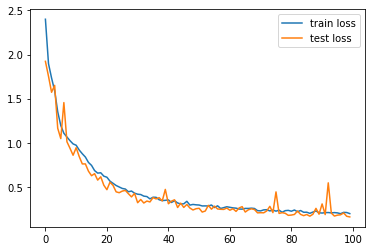

In [46]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()

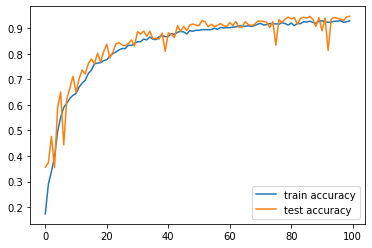

In [47]:
pyplot.plot(history.history['accuracy'], label='train accuracy')
pyplot.plot(history.history['val_accuracy'], label='test accuracy')
pyplot.legend()
pyplot.show()

In [63]:
# model.save("my_model2.h5")

In [66]:
# np.save('xtrain2.npy', X_train)
# np.save('xval2.npy', X_valid)
# np.save('xtest2.npy', X_test)
# np.save('ytrain2.npy', y_train)
# np.save('yval2.npy', y_valid)
# np.save('ytest2.npy', y_test)

In [8]:
X_train = np.load("xtrain2.npy")
X_valid = np.load("xval2.npy")
X_test = np.load("xtest2.npy")
y_train = np.load("ytrain2.npy")
y_valid = np.load("yval2.npy")
y_test = np.load("ytest2.npy")

In [68]:
X_train

array([[0.01000994, 0.01213175, 0.        , ..., 0.00831123, 0.00711691,
        0.        ],
       [0.00964517, 0.00952778, 0.        , ..., 0.00820025, 0.00705705,
        0.        ],
       [0.00920245, 0.00988637, 0.        , ..., 0.00722652, 0.00677689,
        0.        ],
       ...,
       [0.01056539, 0.00697773, 0.01547266, ..., 0.01161352, 0.01217743,
        0.01412504],
       [0.01091945, 0.00579859, 0.01492158, ..., 0.01231997, 0.0119118 ,
        0.01883339],
       [0.01077207, 0.00781127, 0.01552846, ..., 0.01148838, 0.01216232,
        0.01412504]])

In [3]:
from keras.models import load_model

In [4]:
model=load_model("my_model2.h5")

In [11]:
prediction=model.predict(X_train)
length=len(prediction)
y_label=np.argmax(y_train,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 97.55555555555556


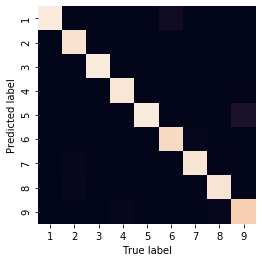

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_label, predict_label)
sns.heatmap(mat.T, square=True, fmt='d', cbar=False, xticklabels=['1','2','3','4','5','6','7','8','9'], yticklabels=['1','2','3','4','5','6','7','8','9'])
plt.xlabel('True label')
plt.ylabel('Predicted label');